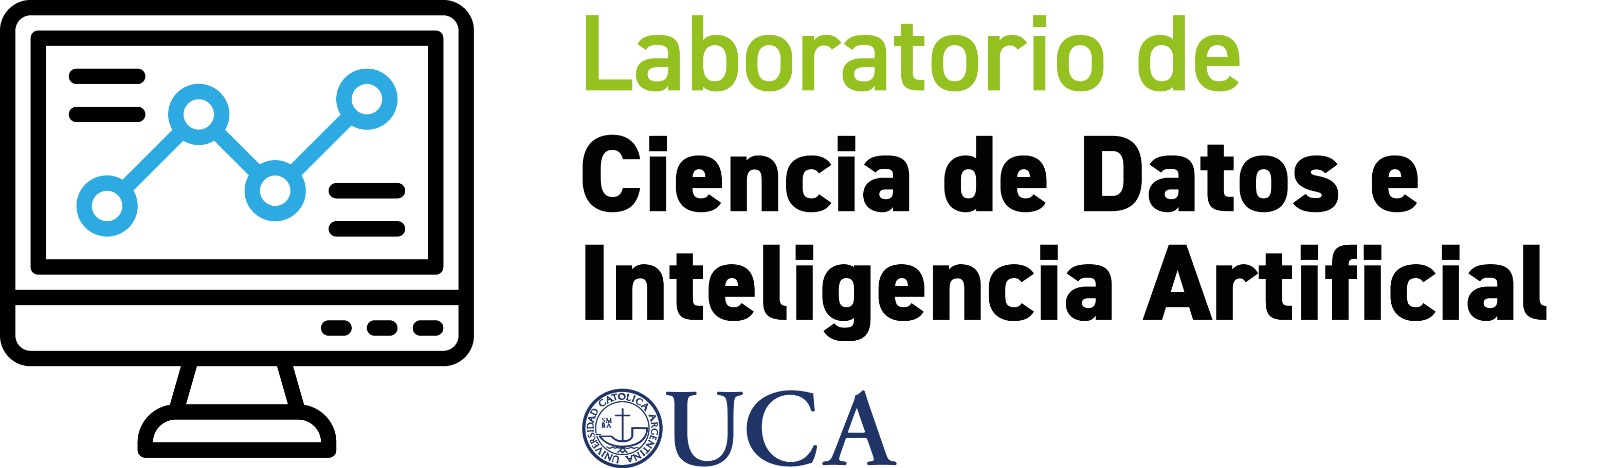


# Taller de Web Scraping

## Nivel 1: Scraping Básico

### Ejemplo 1

In [1]:
import requests
import re

In [ ]:
url1 = "http://books.toscrape.com/"

try:
    response = requests.get(url1)

    if response.status_code == 200:
        print("Conexión exitosa!")
        print("Content-Type:", response.headers["Content-Type"])
    else:
        print(f"Error: Código {response.status_code}")

except Exception as e:
    print(e)

Conexión exitosa!
Content-Type: text/html


In [ ]:
print(response.headers)

{'Date': 'Mon, 14 Apr 2025 19:47:59 GMT', 'Content-Type': 'text/html', 'Content-Length': '51294', 'Connection': 'keep-alive', 'Last-Modified': 'Wed, 08 Feb 2023 21:02:32 GMT', 'ETag': '"63e40de8-c85e"', 'Accept-Ranges': 'bytes'}


**Obtener el título de la página**

In [ ]:
html = response.text

print(html)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="static/oscar/favicon.

In [ ]:
web_title_pattern = r'<title>\s*(.*)\s*</title>'
web_title = re.findall(web_title_pattern, html)

print(web_title)

['All products | Books to Scrape - Sandbox']


\s: espacio <br>
Los paréntesis alrededor de cualquier parte del patrón de expresión regular hacen que se recuerde esa parte de la subcadena coincidente

### Ejemplo 2

**Obtener los nombres de los libros con sus precios**

In [ ]:
html = response.text

# Extraer títulos (patrón: <h3><a ... title="TEXTO">)
title_pattern = r'<h3><a\b[^>]*title="([^"]*)"'
titles = re.findall(title_pattern, html)

# Extraer precios (patrón: £XX.XX)
price_pattern = r'£\d+\.\d{2}'
prices = re.findall(price_pattern, html)

q=10
for title, price in zip(titles[:q], prices[:q]):
    print(title, "-" , price)

A Light in the Attic - £51.77
Tipping the Velvet - £53.74
Soumission - £50.10
Sharp Objects - £47.82
Sapiens: A Brief History of Humankind - £54.23
The Requiem Red - £22.65
The Dirty Little Secrets of Getting Your Dream Job - £33.34
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull - £17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics - £22.60
The Black Maria - £52.15


In [ ]:
# Crear DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Price': prices
})

In [ ]:
df.head(10)

,Title,Price
0,A Light in the Attic,£51.77
1,Tipping the Velvet,£53.74
2,Soumission,£50.10
3,Sharp Objects,£47.82
4,Sapiens: A Brief History of Humankind,£54.23
5,The Requiem Red,£22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60
9,The Black Maria,£52.15


In [ ]:
# Limpiar precios (opcional: convertir a numérico)
df['Price'] = df['Price'].str.replace('£', '').astype(float)

In [ ]:
df.head(10)

,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15


In [ ]:
# Guardar en CSV
df.to_csv('libros.csv', index=False)

### Ejemplo 3

In [ ]:

# URL del artículo de Wikipedia
url = 'https://es.wikipedia.org/wiki/Ciencia_de_datos'

# Realizamos la solicitud GET
response = requests.get(url)

# Verificamos el código de estado
if response.status_code == 200:
    # Extraemos el contenido HTML de la respuesta
    html_content = response.text

    # Usamos expresiones regulares para encontrar enlaces
    links = re.findall(r'href="(https://[^\s]+)"', html_content)

    # Imprimimos los enlaces encontrados
    print("Enlaces encontrados:")
    for link in links:
        print(link)
else:
    print(f'Error: {response.status_code} - {response.reason}')

Enlaces encontrados:
https://es.wikipedia.org/wiki/Ciencia_de_datos
https://creativecommons.org/licenses/by-sa/4.0/deed.es
https://donate.wikimedia.org/?wmf_source=donate&amp;wmf_medium=sidebar&amp;wmf_campaign=es.wikipedia.org&amp;uselang=es
https://donate.wikimedia.org/?wmf_source=donate&amp;wmf_medium=sidebar&amp;wmf_campaign=es.wikipedia.org&amp;uselang=es
https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA
https://az.wikipedia.org/wiki/Veril%C9%99nl%C9%99r_elmi
https://bg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%83%D0%BA%D0%B0_%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8%D1%82%D0%B5
https://bn.wikipedia.org/wiki/%E0%A6%89%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A7%8D%E0%A6%A4_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8
https://ca.wikipedia.org/wiki/Ci%C3%A8ncia_de_les_dades
https://cs.wikipedia.org/wiki/Data_science
https://de.wikipedia.org/wiki/Data_Science
https://el.wikipedia.org/wiki/%CE%95%CF%80%CE%B9%CF%83%CF%84%CE%AE%CE%BC%CE

### Ejemplo 4

In [2]:
# URL de una imagen de ejemplo (puedes cambiarla por cualquier URL de imagen)
url_imagen = "https://lvwerra.github.io/dslectures/images/data-meme.jpg"

try:
    # Hacer la solicitud GET para descargar la imagen
    response3 = requests.get(url_imagen)

    # Verificar si la solicitud fue exitosa
    if response3.status_code == 200:
        print("Content-Type:", response3.headers["Content-Type"])
        # Guardar la imagen en modo binario
        with open("imagen_descargada.jpg", "wb") as archivo:
            archivo.write(response3.content)
        print("¡Imagen descargada correctamente!")

        #Abrir la imagen automáticamente
        #import subprocess
        #subprocess.run(["xdg-open", "imagen_descargada.jpg"])  # Linux
        #os.startfile("imagen_descargada.jpg")  # Windows

    else:
        print(f"Error al descargar: Código {response3.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Error de conexión: {e}")

Content-Type: image/jpeg
¡Imagen descargada correctamente!


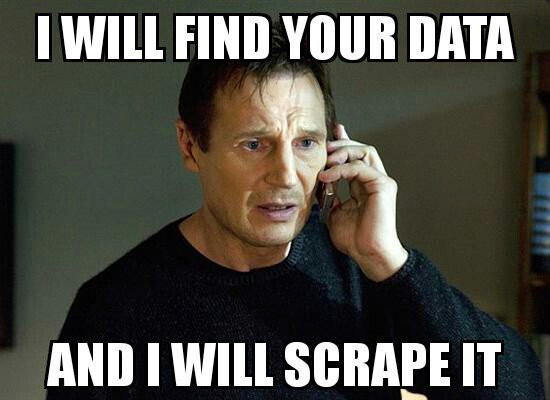

In [3]:
from IPython.display import Image, display

display(Image(response3.content))